### Preprocessing

In [136]:
import numpy as np
import pandas as pd

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
np.random.seed(1)

Text(0.5,1,'data with non-linear class family')

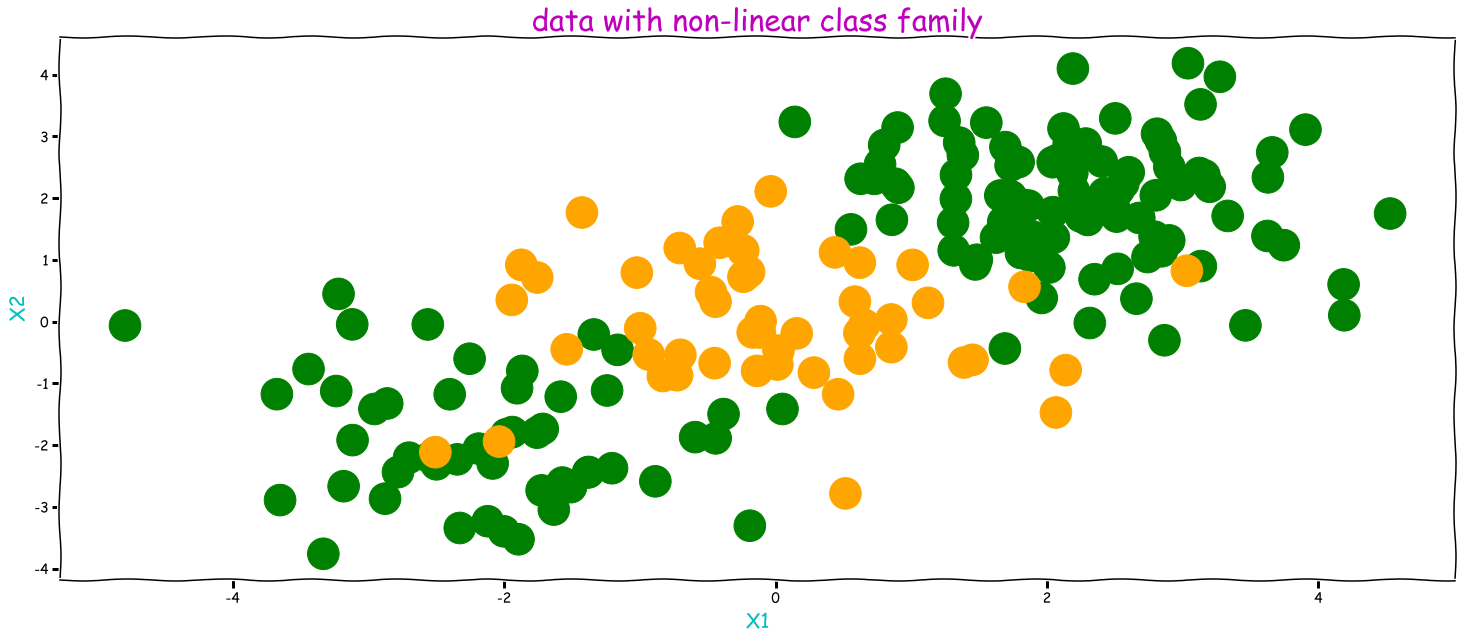

In [139]:
from sklearn.model_selection import train_test_split

X = np.random.normal(size=(200,2))
X[:100] += 2
X[100:150] -= 2
y = np.concatenate([1*np.ones((150,)), np.zeros((50,))])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X[:, 0], X[:, 1], c=['green' if val==1 else 'orange' for val in y], marker='o', s=1000)
plt.xlabel('X1', color='c', fontsize=20)
plt.ylabel('X2', color='c', fontsize=20)
plt.title('data with non-linear class family', color='m', fontsize=30)

In [157]:
from sklearn.svm import SVC

svmfit = SVC(C=10, kernel='rbf', gamma=1).fit(X_train, y_train)

Text(0.5,1,'support vector machine')

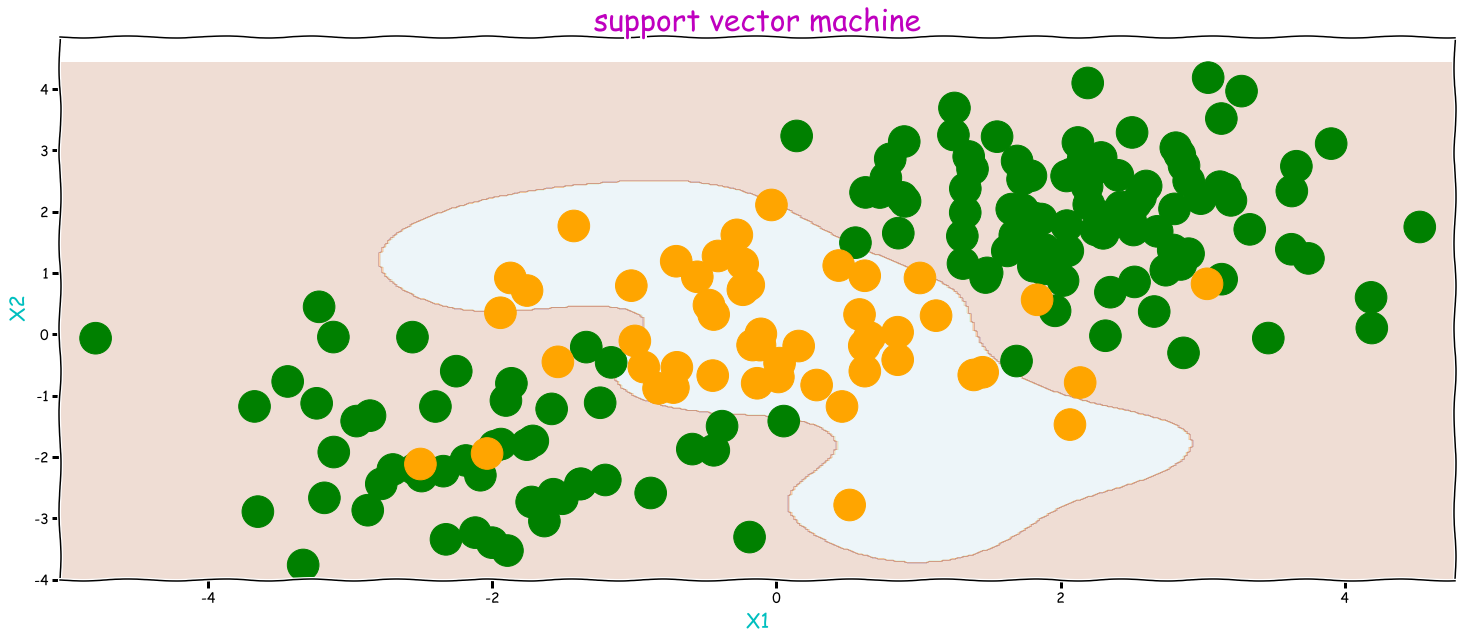

In [158]:
def svmplot(svc, X, y, height=0.02, buffer=0.25):
    x_min, x_max = X[:, 0].min()-buffer, X[:, 0].max()+buffer
    y_min, y_max = X[:, 1].min()-buffer, X[:, 1].max()+buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, height), np.arange(y_min, y_max, height))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X[:, 0], X[:, 1], c=['green' if val==1 else 'orange' for val in y], marker='o', s=1000)
plt.xlabel('X1', color='c', fontsize=20)
plt.ylabel('X2', color='c', fontsize=20)
plt.title('support vector machine', color='m', fontsize=30)

In [159]:
svmfit.support_ # these are the support vectors

array([ 3,  5,  9, 13, 44, 51, 53, 65, 70, 80, 88, 91, 99,  2,  6,  7,  8,
       10, 21, 24, 27, 31, 34, 39, 40, 42, 45, 46, 47, 52, 55, 56, 67, 74,
       75, 76, 79, 82, 83, 92, 94], dtype=int32)

In [160]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = pd.DataFrame(confusion_matrix(y_test, svmfit.predict(X_test)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat

,0.0,1.0
0.0,21,0
1.0,6,73


In [161]:
class_mat = classification_report(y_test, svmfit.predict(X_test))
print(class_mat)

              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88        27
         1.0       0.92      1.00      0.96        73

   micro avg       0.94      0.94      0.94       100
   macro avg       0.96      0.89      0.92       100
weighted avg       0.94      0.94      0.94       100



Text(0.5,1,'support vector machine')

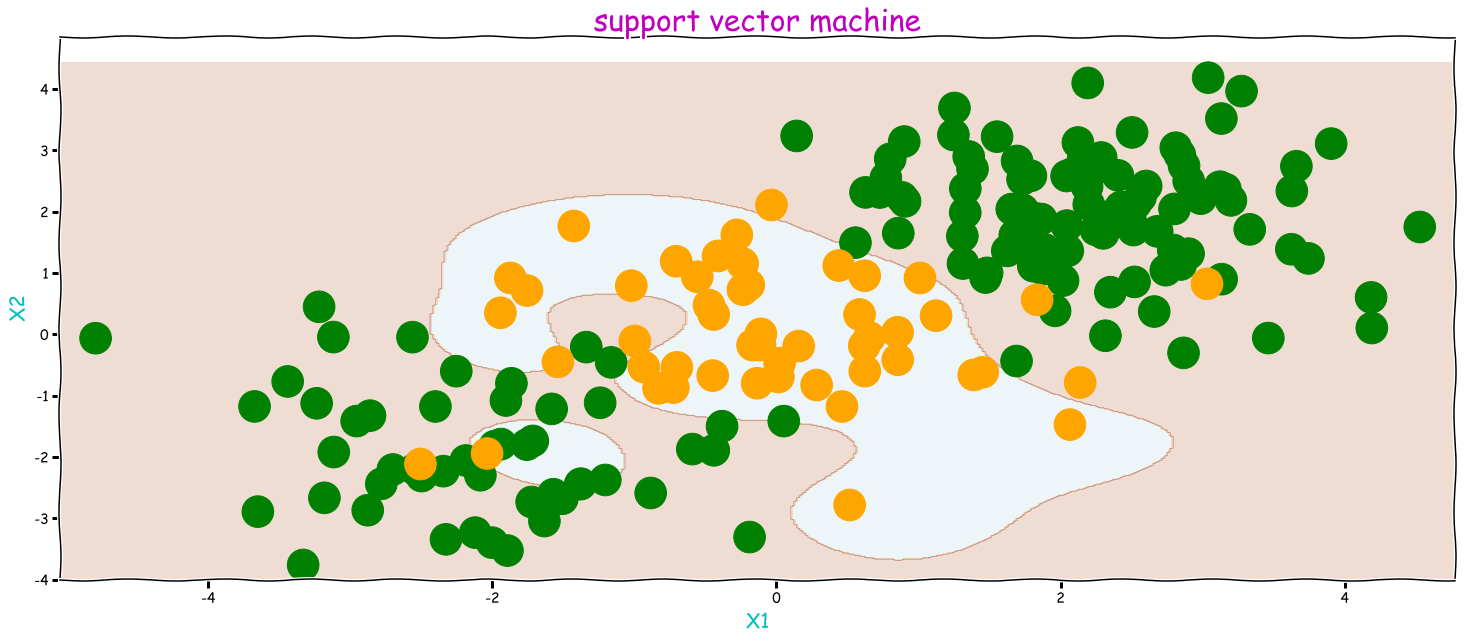

In [162]:
# making the SVM more flexible
svmfit = SVC(C=100, kernel='rbf', gamma=1).fit(X_train, y_train)

plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X[:, 0], X[:, 1], c=['green' if val==1 else 'orange' for val in y], marker='o', s=1000)
plt.xlabel('X1', color='c', fontsize=20)
plt.ylabel('X2', color='c', fontsize=20)
plt.title('support vector machine', color='m', fontsize=30)

In [163]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, svmfit.predict(X_test)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat

,0.0,1.0
0.0,21,8
1.0,6,65


In [164]:
class_mat = classification_report(y_test, svmfit.predict(X_test))
print(class_mat)

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75        27
         1.0       0.92      0.89      0.90        73

   micro avg       0.86      0.86      0.86       100
   macro avg       0.82      0.83      0.83       100
weighted avg       0.86      0.86      0.86       100



Text(0.5,1,'support vector machine')

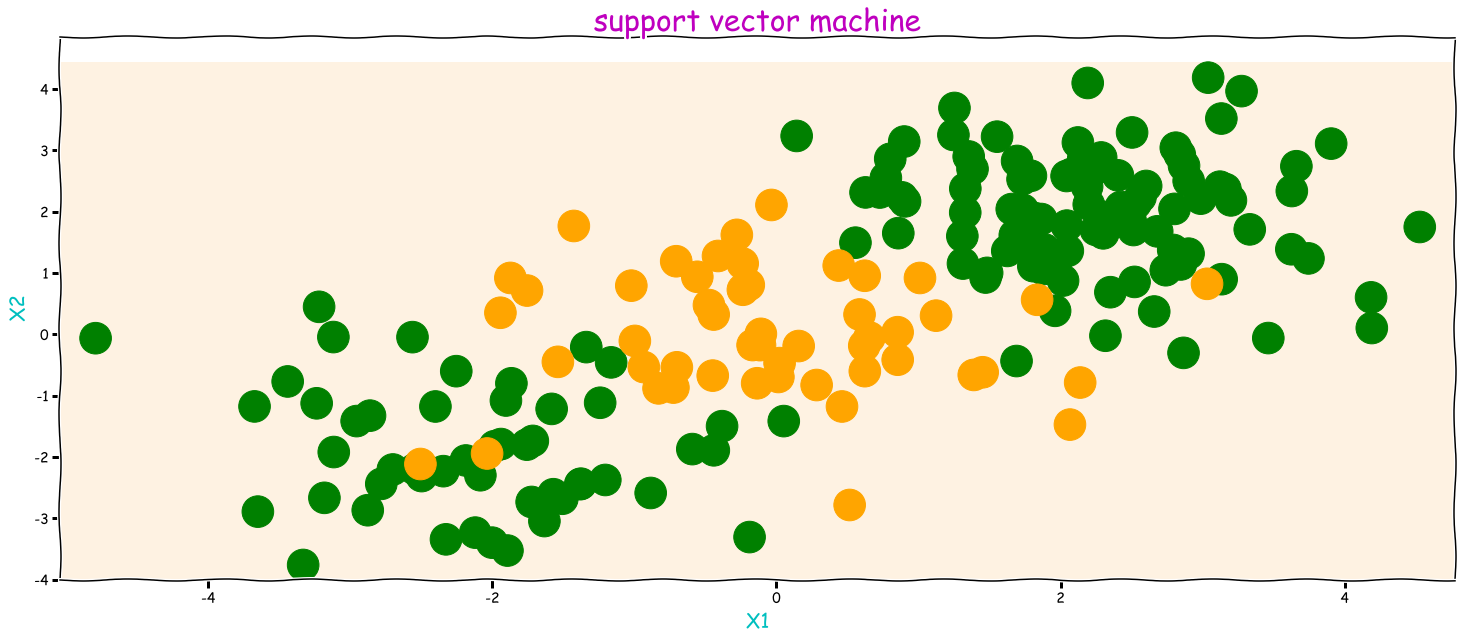

In [165]:
# making the SVM less flexible
svmfit = SVC(C=0.1, kernel='rbf', gamma=1).fit(X_train, y_train)

plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X[:, 0], X[:, 1], c=['green' if val==1 else 'orange' for val in y], marker='o', s=1000)
plt.xlabel('X1', color='c', fontsize=20)
plt.ylabel('X2', color='c', fontsize=20)
plt.title('support vector machine', color='m', fontsize=30)

In [166]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, svmfit.predict(X_test)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat

,0.0,1.0
0.0,0,0
1.0,27,73


In [167]:
import warnings
warnings.filterwarnings('ignore')

class_mat = classification_report(y_test, svmfit.predict(X_test))
print(class_mat)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        27
         1.0       0.73      1.00      0.84        73

   micro avg       0.73      0.73      0.73       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.53      0.73      0.62       100



### Using cross-validation to find the optimal cost

In [168]:
from sklearn.model_selection import GridSearchCV as GSV

In [169]:
cost_range = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1,2,3,4]}]
cost_cv= GSV(SVC(kernel='rbf'), cost_range, cv=10, scoring='accuracy', return_train_score=True).fit(X, y)

In [170]:
best_params = cost_cv.best_params_
best_params['C']

1

**GridSearchCV suggests that the best results are obtained at C=10.**

Text(0.5,1,'support vector machine')

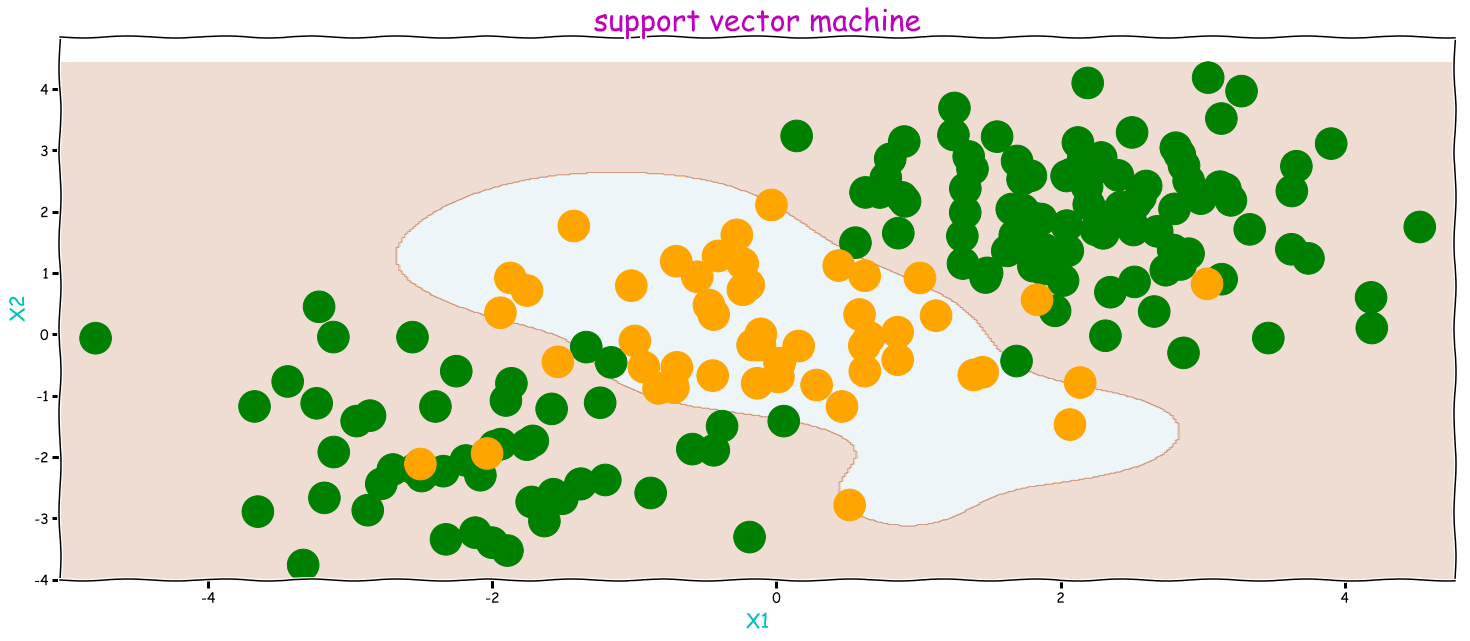

In [171]:
svmfit = SVC(C=best_params['C'], kernel='rbf', gamma=1).fit(X_train, y_train)

plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X[:, 0], X[:, 1], c=['green' if val==1 else 'orange' for val in y], marker='o', s=1000)
plt.xlabel('X1', color='c', fontsize=20)
plt.ylabel('X2', color='c', fontsize=20)
plt.title('support vector machine', color='m', fontsize=30)

In [172]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, svmfit.predict(X_test)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat

,0.0,1.0
0.0,22,0
1.0,5,73


In [173]:
import warnings
warnings.filterwarnings('ignore')

class_mat = classification_report(y_test, svmfit.predict(X_test))
print(class_mat)

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        27
         1.0       0.94      1.00      0.97        73

   micro avg       0.95      0.95      0.95       100
   macro avg       0.97      0.91      0.93       100
weighted avg       0.95      0.95      0.95       100



**Therefore, the best results are obtained at C=1.**